# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import mythinkstats as mts
import numpy as np
import pandas as pd

print('Ready')

Ready


## Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

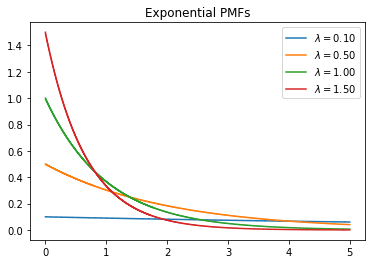

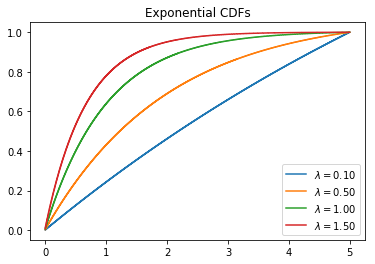

In [2]:
for lam in [0.1, 0.5, 1, 1.5]:
    pmf = mts.pmf_exponential(lam)
    plt.step(pmf.index, pmf.values, label='$\lambda=%.2lf$' % lam)
plt.legend()
plt.title('Exponential PMFs')
plt.show()

for lam in [0.1, 0.5, 1, 1.5]:
    pmf = mts.pmf_exponential(lam)
    cdf = mts.pmf_to_cdf(pmf)
    plt.step(cdf.index, cdf.values, label='$\lambda=%.2lf$' % lam)
plt.legend()
plt.title('Exponential CDFs')
plt.show()

Here's the distribution of interarrival times from a dataset of birth times.

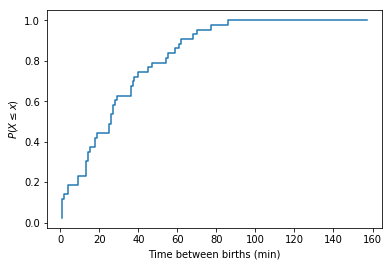

In [3]:
df = mts.babyboom_read_data(filename='ThinkStats2/code/babyboom.dat')
diffs_pmf = df.minutes.diff().value_counts(normalize=True)
diffs_cdf = mts.pmf_to_cdf(diffs_pmf)

plt.step(diffs_cdf.index, diffs_cdf.values)
plt.xlabel('Time between births (min)')
plt.ylabel('$P(X \leq x)$')
plt.show()

Here's what the CCDF looks like on a log-y scale.  A straight line is consistent with an exponential distribution.

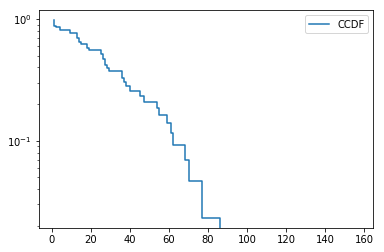

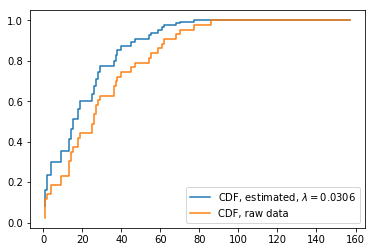

In [4]:
plt.step(diffs_cdf.index, 1 - diffs_cdf.values, label='CCDF')
plt.yscale('log')
plt.legend()
plt.show()

lam_est = len(df) / (24 * 60) # Births / minute.
diffs_est_pmf = mts.pmf_exponential(lam_est, X=diffs_cdf.index)
diffs_est_cdf = mts.pmf_to_cdf(diffs_est_pmf)
plt.step(diffs_est_cdf.index, diffs_est_cdf.values, label='CDF, estimated, $\lambda=%.4lf$' % lam_est)
plt.step(diffs_cdf.index, diffs_cdf.values, label='CDF, raw data')
plt.legend()
plt.show()

## Normal distribution

Here's what the normal CDF looks like with a range of parameters.

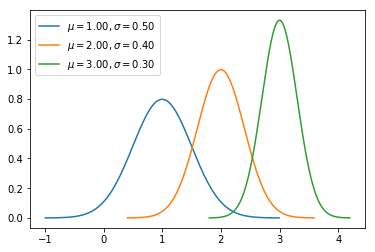

In [5]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    pmf = mts.pmf_normal(mu, sigma).sort_index()
    plt.plot(pmf.index, pmf.values, label='$\mu=%.2lf, \sigma=%.2lf$' % (mu, sigma))
    
plt.legend()
plt.show()

I'll use a normal model to fit the distribution of birth weights from the NSFG.

In [6]:
# Load birth weights. Downey removes outliers at some points. I skip that part.
preg = mts.nsfg_read_data('ThinkStats2/code/2002FemPreg.dct', 'ThinkStats2/code/2002FemPreg.dat.gz')
birth_weights 
= preg.totalwgt_lb.dropna()
birth_weights = mts.trim_outliers(birth_weights, p=0.01)

Here's the observed CDF and the model.  The model fits the data well except in the left tail.

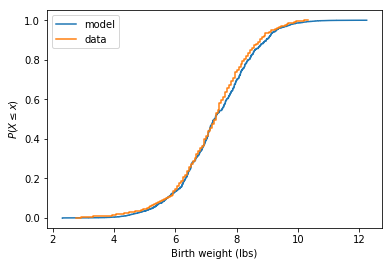

In [7]:
# Generate and plot Normal model CDF based on sample mean and standard error.
mean = birth_weights.mean()
ster = birth_weights.std()
model_pmf = mts.pmf_normal(mean, ster)
model_cdf = mts.pmf_to_cdf(model_pmf)
plt.step(model_cdf.index, model_cdf.values, label='model')

# Plot raw data CDF.
data_pmf = birth_weights.value_counts(normalize=True)
data_cdf = mts.pmf_to_cdf(data_pmf)
plt.step(data_cdf.index, data_cdf.values, label='data')

plt.xlabel('Birth weight (lbs)')
plt.ylabel('$P(X \leq x)$')
plt.legend()
plt.show()

A normal probability plot is a visual test for normality.  The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

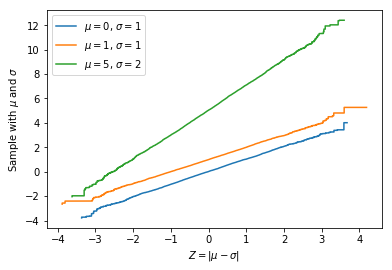

In [8]:
n = 10000
mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    X = np.random.normal(0, 1, n)
    Y = np.random.normal(mu, sigma, n)
    plt.step(sorted(X), sorted(Y), label='$\mu=%d$, $\sigma=%d$' % (mu, sigma))
    
plt.ylabel('Sample with $\mu$ and $\sigma$')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

Here's the normal probability plot for birth weights, showing that the lightest babies are lighter than we expect from the normal mode, and the heaviest babies are heavier.

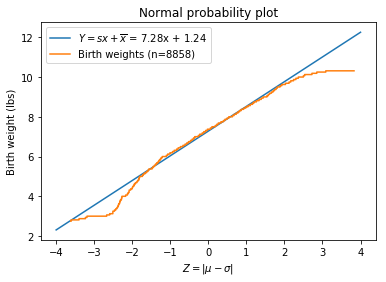

In [9]:
# Important to remember that the X-axis represents standard deviations from the mean (aka Z-scores).
mean = birth_weights.mean()
ster = birth_weights.std()

X = np.linspace(-4, 4, 2)
Y = ster * X + mean
plt.plot(X, Y, label='$Y = sx + \overline{x}$ = %.2lfx + %.2lf' % (mean, ster))

Y = sorted(birth_weights)
X = sorted(np.random.normal(0, 1, len(Y)))
plt.step(X, Y, label='Birth weights (n=%d)' % len(Y))

plt.title('Normal probability plot')
plt.ylabel('Birth weight (lbs)')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [10]:
full = preg[preg.prglngth >= 37]
birth_weights_full = full.totalwgt_lb.dropna()
birth_weights_full = mts.trim_outliers(birth_weights_full, p=0.01)

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

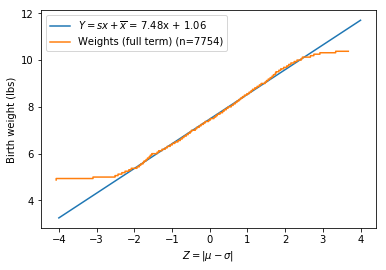

In [11]:
# Note: I didn't trim the outliers like Downey did in his figures.
mean = birth_weights_full.mean()
ster = birth_weights_full.std()

X = np.linspace(-4, 4, 2)
Y = ster * X + mean
plt.plot(X, Y, label='$Y = sx + \overline{x}$ = %.2lfx + %.2lf' % (mean, ster))

Y = sorted(birth_weights_full)
X = sorted(np.random.normal(0, 1, len(Y)))
plt.step(X, Y, label='Weights (full term) (n=%d)' % len(Y))

plt.ylabel('Birth weight (lbs)')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

## Lognormal model

As an example of a lognormal disrtribution, we'll look at adult weights from the BRFSS.

In [12]:
brfss = mts.brfss_read_data('ThinkStats2/code/CDBRFS08.ASC.gz')
adult_weights = brfss.wtkg2.dropna()
adult_weights = mts.trim_outliers(adult_weights, p=0.01)

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [13]:
# Deleted this function.

Here's the distribution of adult weights and a normal model, which is not a very good fit.

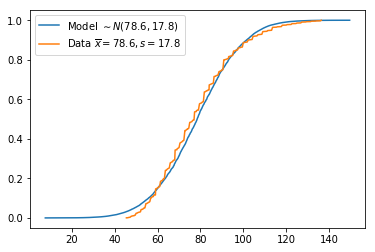

In [14]:
mean = adult_weights.mean()
ster = adult_weights.std()
model_pmf = mts.pmf_normal(mean, ster, n=10000)
model_cdf = mts.pmf_to_cdf(model_pmf)

data_pmf = adult_weights.value_counts(normalize=True)
data_cdf = mts.pmf_to_cdf(data_pmf)

plt.plot(model_cdf.index, model_cdf.values, label='Model $\sim N(%.1lf, %.1lf)$' % (mean, ster))
plt.plot(data_cdf.index, data_cdf.values, label='Data $\overline{x} = %.1lf, s = %.1lf$' % (mean, ster))
plt.legend()
plt.show()

Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale.  The model is a better fit for the data, although the heaviest people are heavier than the model expects.

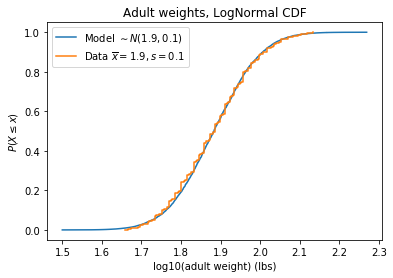

In [15]:
# LogNormal(x) = Normal(log(x))
adult_weights_log10 = np.log10(adult_weights)

mean = adult_weights_log10.mean()
ster = adult_weights_log10.std()
model_pmf = mts.pmf_normal(mean, ster, n=10000)
model_cdf = mts.pmf_to_cdf(model_pmf)

data_pmf = adult_weights_log10.value_counts(normalize=True)
data_cdf = mts.pmf_to_cdf(data_pmf)

plt.step(model_cdf.index, model_cdf.values, label='Model $\sim N(%.1lf, %.1lf)$' % (mean, ster))
plt.step(data_cdf.index, data_cdf.values, label='Data $\overline{x} = %.1lf, s = %.1lf$' % (mean, ster))

plt.title('Adult weights, LogNormal CDF')
plt.ylabel('$P(X \leq x)$')
plt.xlabel('log10(adult weight) (lbs)')
plt.legend()
plt.show()

The following function generates a normal probability plot.

In [16]:
# Deleted this function.

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

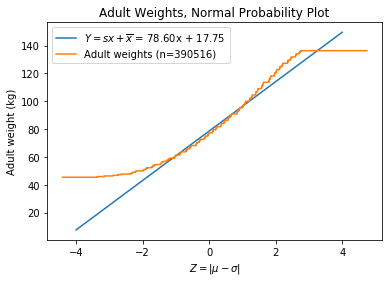

In [17]:
mean = adult_weights.mean()
ster = adult_weights.std()

X = np.linspace(-4, 4, 2)
Y = ster * X + mean
plt.plot(X, Y, label='$Y = sx + \overline{x}$ = %.2lfx + %.2lf' % (mean, ster))

Y = sorted(adult_weights)
X = sorted(np.random.normal(0, 1, len(Y)))
plt.step(X, Y, label='Adult weights (n=%d)' % len(Y))

plt.title('Adult Weights, Normal Probability Plot')
plt.ylabel('Adult weight (kg)')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

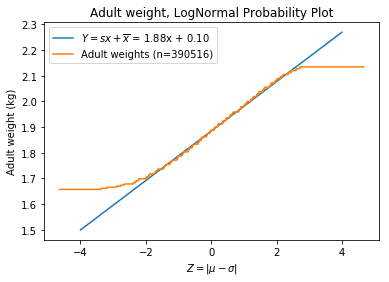

In [18]:
mean = adult_weights_log10.mean()
ster = adult_weights_log10.std()

X = np.linspace(-4, 4, 2)
Y = ster * X + mean
plt.plot(X, Y, label='$Y = sx + \overline{x}$ = %.2lfx + %.2lf' % (mean, ster))

Y = sorted(adult_weights_log10)
X = sorted(np.random.normal(0, 1, len(Y)))
plt.step(X, Y, label='Adult weights (n=%d)' % len(Y))

plt.title('Adult weight, LogNormal Probability Plot')
plt.ylabel('Adult weight (kg)')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

## Pareto distribution

Here's what the Pareto CDF looks like with a range of parameters.

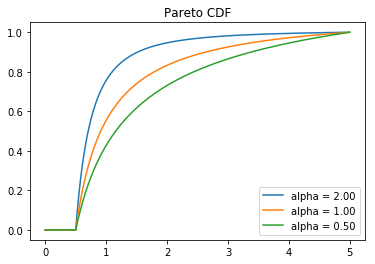

In [19]:
xmin = 0.5

for alpha in [2.0, 1.0, 0.5]:
    pmf = mts.pmf_pareto(xmin, alpha)
    cdf = mts.pmf_to_cdf(pmf)
    plt.plot(cdf.index, cdf.values, label="alpha = %.2lf" % alpha)
    
plt.title('Pareto CDF')
plt.legend()
plt.show()

The distribution of populations for cities and towns is sometimes said to be Pareto-like.

In [20]:
pops = mts.populations_read_data('ThinkStats2/code/PEP_2012_PEPANNRES_with_ann.csv')
print('Number of cities/towns', len(pops))

Number of cities/towns 19515


Here's the distribution of population for cities and towns in the U.S., along with a Pareto model.  The model fits the data well in the tail.

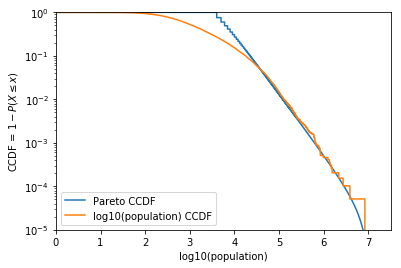

In [21]:
# Compute an anlytic PMF for a Pareto sample, then its CDF.
# Plot the CCDF, with the sample values (index) log-transformed.
pareto_pmf = mts.pmf_pareto(xm=5000, alpha=1.4, X=np.linspace(1e-7, 1e7, 10000))
pareto_cdf = mts.pmf_to_cdf(pareto_pmf)
plt.step(np.log10(pareto_cdf.index), 1 - pareto_cdf.values, label='Pareto CCDF')

# Compute log of the population, then its PMF and CDF.
# Plot the CCDF.
log_pops = np.log10(pops.append(pd.Series([1e7]))) # Need to append to get it to match
log_pops_pmf = log_pops.value_counts(normalize=True)
log_pops_cdf = mts.pmf_to_cdf(log_pops_pmf)
plt.step(log_pops_cdf.index, 1 - log_pops_cdf.values, label='log10(population) CCDF')

plt.ylabel('CCDF = $1 - P(X \leq x)$')
plt.xlabel('log10(population)')
plt.yscale('log')
plt.xlim(0, 7.5)
plt.ylim(10e-6, 1)
plt.legend()
plt.show()

The lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

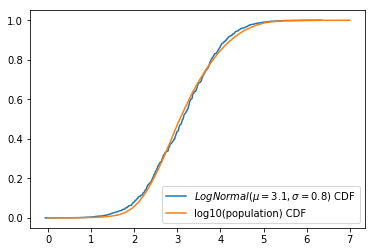

In [22]:
# thinkplot.PrePlot(cols=2)

mean = log_pops.mean()
ster = log_pops.std()
log_normal_pmf = mts.pmf_normal(mean, ster)
log_normal_cdf = mts.pmf_to_cdf(log_normal_pmf)
plt.plot(log_normal_cdf.index, log_normal_cdf.values, 
         label='$LogNormal(\mu=%.1lf, \sigma=%.1lf)$ CDF' % (mean, ster))

plt.plot(log_pops_cdf.index, log_pops_cdf.values, label='log10(population) CDF')
plt.legend()
plt.show()

Here's a normal probability plot for the log-populations.  The model fits the data well except in the right tail, where the biggest cities are bigger than expected.

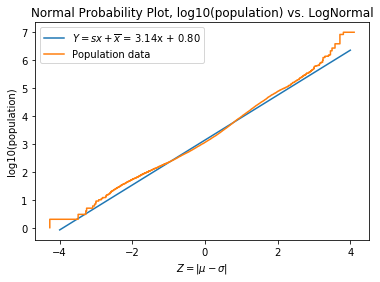

In [23]:
X = np.linspace(-4, 4, 2)
Y = ster * X + mean
plt.plot(X, Y, label='$Y = sx + \overline{x}$ = %.2lfx + %.2lf' % (mean, ster))

Y = sorted(log_pops)
X = sorted(np.random.normal(0, 1, len(Y)))
plt.step(X, Y, label='Population data')

plt.title('Normal Probability Plot, log10(population) vs. LogNormal')
plt.ylabel('log10(population)')
plt.xlabel('$Z = |\mu - \sigma|$')
plt.legend()
plt.show()

## Random variates

When we have an analytic CDF, we can sometimes invert it to generate random values.  The following function generates values from an exponential distribution.

We can test it by generating a sample and plotting the CCDF on a log-y scale.

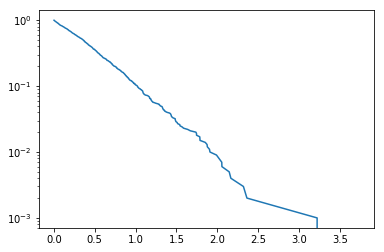

In [24]:
rnd_exp_sample = mts.rnd_exponential(lam=2, n=1000)
rnd_exp_pmf = rnd_exp_sample.value_counts(normalize=True)
rnd_exp_cdf = mts.pmf_to_cdf(rnd_exp_pmf)
plt.plot(rnd_exp_cdf.index, 1 - rnd_exp_cdf.values)
plt.yscale('log')
plt.show()

A straight line is consistent with an exponential distribution.

As an exercise, write a function that generates a Pareto variate.

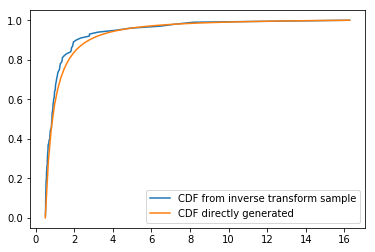

In [26]:
rnd_pareto_sample = mts.rnd_pareto(0.5, 1.4, 100)
rnd_pareto_pmf = rnd_pareto_sample.value_counts(normalize=True)
rnd_pareto_cdf = mts.pmf_to_cdf(rnd_pareto_pmf)
plt.plot(rnd_pareto_cdf.index, rnd_pareto_cdf.values, label='CDF from inverse transform sample')

pareto_pmf = mts.pmf_pareto(0.5, 1.4, X=np.linspace(0.5, max(rnd_pareto_sample), 100))
pareto_cdf = mts.pmf_to_cdf(pareto_pmf)
plt.plot(pareto_cdf.index, pareto_cdf.values, label='CDF directly generated')
plt.legend()
plt.show()

## Exercises

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [27]:
# Approximated without scipy.stats.
# 5'10" = 177.8 cm, 6'1" = 185.42 cm.
heights_pmf = mts.pmf_normal(mu=178, sig=7.7, n=50000, Z=4)
heights_cdf = mts.pmf_to_cdf(heights_pmf)

lo = mts.cdf_percentile_rank(heights_cdf, 177.8)
hi = mts.cdf_percentile_rank(heights_cdf, 185.4)

print('percentage of men between 177.8 and 185.42 cm = %.2lf' % (hi - lo))

percentage of men between 177.8 and 185.42 cm = 34.14


For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [28]:
import scipy.stats
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [29]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [30]:
dist.cdf(mu-sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [31]:
# Solution goes here
lo = dist.cdf(177.8)
hi = dist.cdf(185.4)
print((hi - lo) * 100)

34.20946829459531


**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [32]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [33]:
# Solution goes here
dist.mean()

2.428571428571429

What fraction of people are shorter than the mean?

In [34]:
# Solution goes here
dist.cdf(dist.mean())

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [39]:
# Solution goes here
print('People taller than 1KM (out of 7 billion) = %d' % ((1 - dist.cdf(1000)) * 7e9))

People taller than 1KM (out of 7 billion) = 55602


How tall do we expect the tallest person to be?

In [41]:
# Solution goes here
h = dist.ppf(1 - (1/7e9))
print('Tallest person is %d meters tall, taller than %d other people' % (h, dist.cdf(h) * 7e9))

Tallest person is 618349 meters tall, taller than 6999999999 other people


**Exercise:** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

`thinkplot.Cdf` provides a transform that makes the CDF of a Weibull distribution look like a straight line.

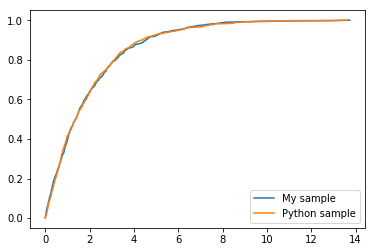

/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


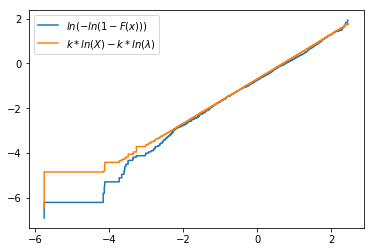

In [42]:
# Parameters.
lam, k = 2, 1

# Random weibull sample via inverse sampling method.
from random import weibullvariate
sample = mts.rnd_weibull(lam, k, n=1000)
pmf = sample.value_counts(normalize=True)
cdf = mts.pmf_to_cdf(pmf)
plt.plot(cdf.index, cdf.values, label='My sample')

sample = [weibullvariate(lam, k) for _ in range(1000)]
pmf = pd.Series(sample).value_counts(normalize=True)
cdf = mts.pmf_to_cdf(pmf)
plt.plot(cdf.index, cdf.values, label='Python sample')
plt.legend()
plt.show()

# The following transformation makes the CDF a straight line:
# CDF(x) = F(x) = exp(-(x / lam)^k)
# log(-log(1 - F(x))) = k*log(x) - k*log(lam)
# See https://en.wikipedia.org/wiki/Weibull_distribution#Weibull_plot
# I don't fully understand why you have to take the log of
# the X values, but that's what makes the plots form a straight line.
# If you don't take the log of X values, the curves still match up,
# but it doesn't form a straight line.
sample = pd.Series([weibullvariate(lam, k) for _ in range(1000)])
cdf = mts.pmf_to_cdf(sample.value_counts(normalize=True))
weibull_transform = lambda Fx: np.log(-1 * np.log(1 - Fx))
plt.step(np.log(cdf.index), weibull_transform(cdf.values), label='$ln(-ln(1 - F(x)))$')

plt.step(np.log(cdf.index), (k * np.log(cdf.index)) - (k * np.log(lam)), label='$k*ln(X) - k*ln(\lambda)$')
plt.legend()
plt.show()

**Exercise:** For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

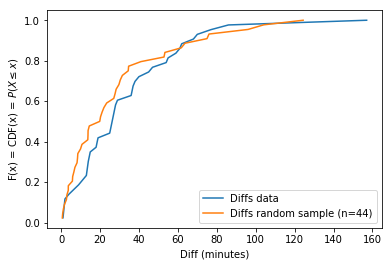

In [43]:
boom = mts.babyboom_read_data('ThinkStats2/code/babyboom.dat')
diffs = boom.minutes.diff()
diffs_cdf = mts.pmf_to_cdf(diffs.value_counts(normalize=True))

n = len(diffs)
lam = n / 24 / 60
sample = mts.rnd_exponential(lam, n)
sample_cdf = mts.pmf_to_cdf(sample.value_counts(normalize=True))

plt.plot(diffs_cdf.index, diffs_cdf.values, label='Diffs data')
plt.plot(sample_cdf.index, sample_cdf.values, label='Diffs random sample (n=%d)'% n)
plt.xlabel('Diff (minutes)')
plt.ylabel('F(x) = CDF(x) = $P(X \leq x)$')
plt.legend()
plt.show()

**Worked Example:** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

In [44]:
wealth = mts.hinc_read_data('ThinkStats2/code/hinc06.csv')
wealth.income.clip(0, 250001, inplace=True)
wealth.describe()

,income,freq,cumsum,ps
count,42.000000,42.000000,42.000000,42.000000
mean,109522.857143,2915.666667,85451.547619,0.697803
std,65274.474543,2160.505402,34096.220084,0.278432
min,4999.000000,364.000000,4204.000000,0.034330
25%,56249.000000,1124.250000,66096.000000,0.539744
50%,107499.000000,2577.500000,99158.000000,0.809731
75%,158749.000000,4331.000000,112628.750000,0.919734
max,250001.000000,7157.000000,122458.000000,1.000000


Here's what the CDF looks like on a linear scale.

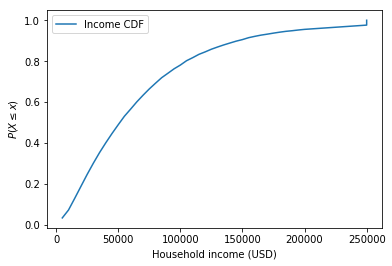

In [45]:
income_pmf = pd.Series(wealth.freq.values, index=wealth.income)
income_cdf = mts.pmf_to_cdf(income_pmf)

plt.plot(income_cdf.index, income_cdf.values, label='Income CDF')
plt.ylabel('$P(X \leq x)$')
plt.xlabel('Household income (USD)')
plt.legend()
plt.show()

To check whether a Pareto model describes the data well, I plot the CCDF on a log-log scale.

I found parameters for the Pareto model that match the tail of the distribution.

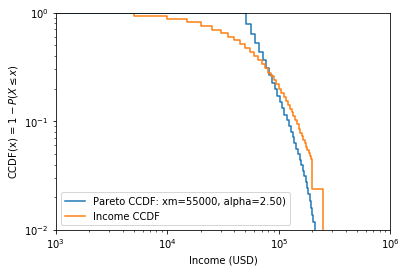

In [46]:
# Parameters defined in book.
xm = 55000
alpha = 2.5

pareto_pmf = mts.pmf_pareto(xm=55000, alpha=2.5, X=np.linspace(0, wealth.income.max()))
pareto_cdf = mts.pmf_to_cdf(pareto_pmf)
plt.step(pareto_cdf.index, 1 - pareto_cdf.values, label='Pareto CCDF: xm=%d, alpha=%.2lf)' % (xm, alpha))

plt.step(income_cdf.index, 1 - income_cdf.values, label='Income CCDF')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('CCDF(x) = $1 - P(X \leq x)$')
plt.xlabel('Income (USD)')
plt.ylim(10e-3, 1)
plt.xlim(10e2, 10e5)
plt.legend()
plt.show()

For the lognormal model I estimate mu and sigma using percentile-based statistics (median and IQR).

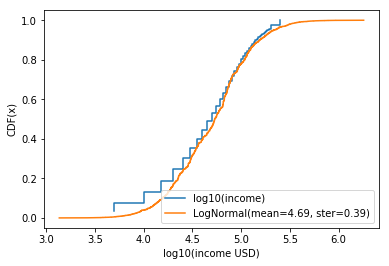

In [47]:
# LogNormal(x) = Normal(log(x))
log_income_pmf = pd.Series(wealth.freq.values, index=np.log10(wealth.income)) / wealth.freq.sum()
log_income_cdf = mts.pmf_to_cdf(log_income_pmf)
plt.step(log_income_cdf.index, log_income_cdf.values, label='log10(income)')

mean = mts.pmf_expectation(log_income_pmf)
ster = np.sqrt(mts.pmf_variance(log_income_pmf))

log_normal_pmf = mts.pmf_normal(mean, ster)
log_normal_cdf = mts.pmf_to_cdf(log_normal_pmf)
plt.step(log_normal_cdf.index, log_normal_cdf.values, label='LogNormal(mean=%.2lf, ster=%.2lf)' % (mean, ster))

plt.ylabel('CDF(x)')
plt.xlabel('log10(income USD)')
plt.legend()
plt.show()

Here's what the distribution, and fitted model, look like on a log-x scale.

My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top
   10-20% of incomes.

2) The lognormal model captures the shape of the distribution better,
   with some deviation in the left tail.  With different
   choices for sigma, you could match the upper or lower tail, but not
   both at the same time.
 
In summary I would say that neither model captures the whole distribution,
so you might have to 

1) look for another analytic model, 

2) choose one that captures the part of the distribution that is most 
   relevent, or 

3) avoid using an analytic model altogether.

In [48]:
print('Done')

Done
